# Data Visualization Project Notebook


## Imports


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os

dataset_path = "StateNames.csv"


## Loading


In [2]:
df = pd.read_csv(dataset_path)

df


,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
...,...,...,...,...,...,...
5647421,5647422,Seth,2014,M,WY,5
5647422,5647423,Spencer,2014,M,WY,5
5647423,5647424,Tyce,2014,M,WY,5
5647424,5647425,Victor,2014,M,WY,5


In [3]:
num_unique_names = df["Name"].nunique()
num_unique_names


30274

## Cleaning


In [4]:
df.isnull().sum()


Id        0
Name      0
Year      0
Gender    0
State     0
Count     0
dtype: int64

## Transforming


In [5]:
df.drop("Id", axis=1, inplace=True)

df


,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
5647421,Seth,2014,M,WY,5
5647422,Spencer,2014,M,WY,5
5647423,Tyce,2014,M,WY,5
5647424,Victor,2014,M,WY,5


In [6]:
df_2000 = df[df["Year"] >= 2000]

df_2000


,Name,Year,Gender,State,Count
10543,Hannah,2000,F,AK,58
10544,Madison,2000,F,AK,50
10545,Emily,2000,F,AK,48
10546,Sarah,2000,F,AK,39
10547,Ashley,2000,F,AK,36
...,...,...,...,...,...
5647421,Seth,2014,M,WY,5
5647422,Spencer,2014,M,WY,5
5647423,Tyce,2014,M,WY,5
5647424,Victor,2014,M,WY,5


## Visualization


In [14]:
def convert(data):
    if isinstance(data, dict):
        return {convert(key): convert(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert(element) for element in data]
    elif isinstance(data, np.int64):
        return int(data)
    else:
        return data


In [7]:
current_directory = os.getcwd()


In [12]:
# Group the dataframe by Name, Year, and Gender and calculate the count
name_data_grouped = df.groupby(['Name', 'Year', 'Gender']).agg({'Count': 'sum'}).reset_index()

# Convert the grouped data to the desired format
name_data_dict = {}
for (name, gender), group in name_data_grouped.groupby(['Name', 'Gender']):
    if name not in name_data_dict:
        name_data_dict[name] = {}
    if gender not in name_data_dict[name]:  # Ensure the gender key is checked
        name_data_dict[name][gender] = {
            "Data": []
        }
    for year, data_group in group.groupby('Year'):
        count_sum = data_group['Count'].sum()
        name_data_dict[name][gender]["Data"].append({"Year": year, "Count": count_sum})



In [15]:
# Output to JSON file
output_file_name = "names_data.json"
output_file_path = os.path.join(current_directory, output_file_name)
# Convert int64 values in the dictionary
converted_name_data_dict = convert(name_data_dict)

# Write the converted dictionary to JSON file
with open(output_file_path, 'w') as json_file:
    json.dump(converted_name_data_dict, json_file, indent=4)

print(f"Name data by year has been saved to {output_file_path}")


Name data by year has been saved to /Users/lukakuterovac/Documents/Code/data-visualization-project/dataset/names_data.json


In [8]:
most_popular_by_year = df.groupby("Year").apply(lambda x: x.loc[x["Count"].idxmax()])[
    ["Year", "Name", "Gender", "Count"]
]

# Convert to dictionary format
most_popular_by_year_dict = most_popular_by_year.reset_index(drop=True).to_dict(
    orient="records"
)

# Output to JSON file
output_file_name = "name_by_year.json"
output_file_path = os.path.join(current_directory, output_file_name)

with open(output_file_path, "w") as json_file:
    json.dump(most_popular_by_year_dict, json_file, indent=4)

print(f"Most popular names by year have been saved to {output_file_path}")


Most popular names by year have been saved to /Users/lukakuterovac/Documents/Code/data-visualization-project/dataset/name_by_year.json


/var/folders/mj/wsz0w1116k71ssqm8yfr9xdr0000gn/T/ipykernel_40501/229211499.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_by_year = df.groupby("Year").apply(lambda x: x.loc[x["Count"].idxmax()])[


/var/folders/mj/wsz0w1116k71ssqm8yfr9xdr0000gn/T/ipykernel_38682/296411707.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_by_year = df_2000.groupby("Year").apply(lambda x: x.loc[x["Count"].idxmax()])


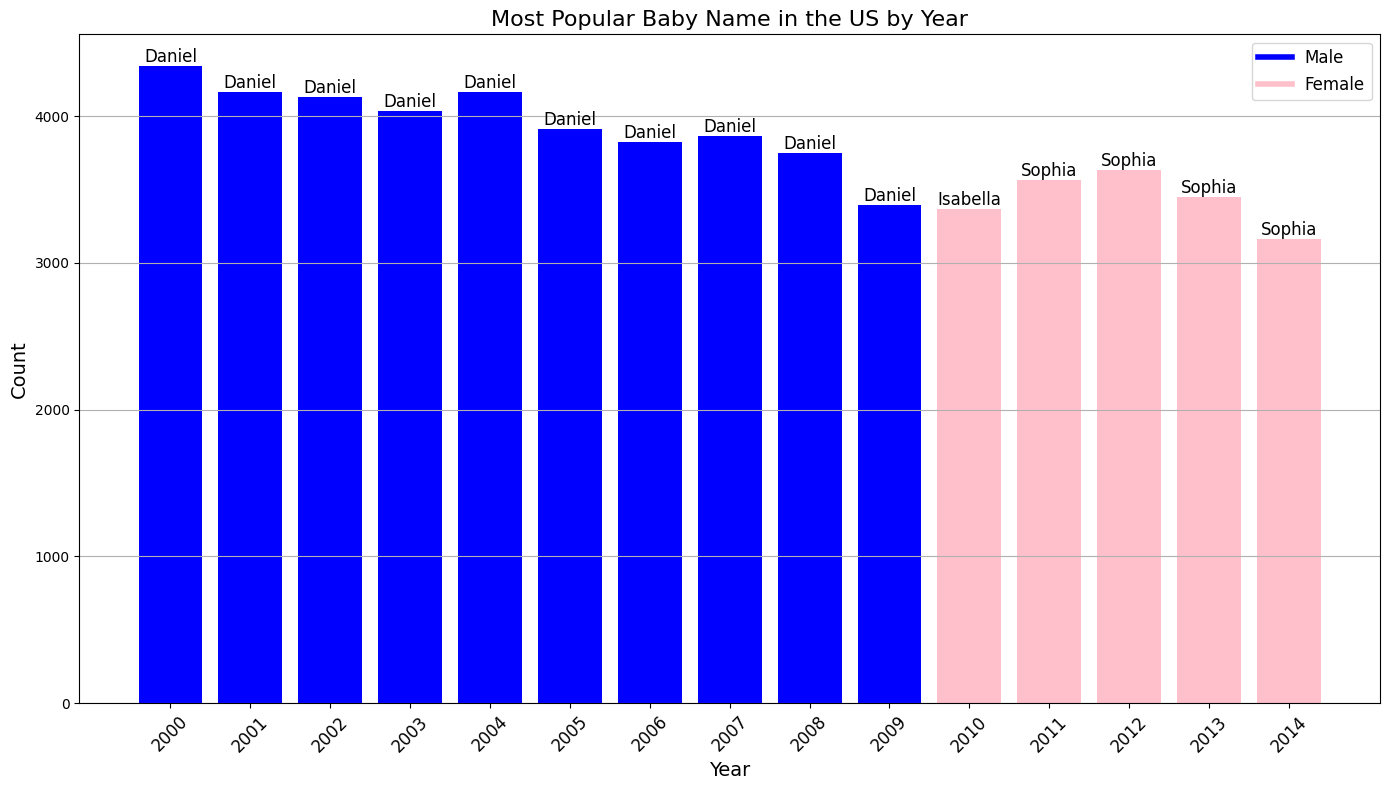

In [7]:
# Find the most popular name by year
most_popular_by_year = df_2000.groupby("Year").apply(
    lambda x: x.loc[x["Count"].idxmax()]
)

# Extract Year, Name, Gender, and Count for the most popular names
most_popular_by_year = most_popular_by_year[
    ["Year", "Name", "Gender", "Count"]
].reset_index(drop=True)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors based on gender
color_map = {"M": "blue", "F": "pink"}
bar_colors = [color_map[gender] for gender in most_popular_by_year["Gender"]]

# Create a bar plot with gender-based colors
bars = ax.bar(
    most_popular_by_year["Year"], most_popular_by_year["Count"], color=bar_colors
)

# Add annotations
for bar, name in zip(bars, most_popular_by_year["Name"]):
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        name,
        va="bottom",
        ha="center",
        fontsize=12,
    )

# Add labels and title
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Most Popular Baby Name in the US by Year", fontsize=16)

# Set x-ticks with increased font size
ax.set_xticks(most_popular_by_year["Year"])
ax.set_xticklabels(most_popular_by_year["Year"], rotation=45, fontsize=12)

# Add grid lines
ax.grid(axis="y")

# Add legend
# legend_labels = [
#     plt.Line2D([0], [0], color=color_map[gender], lw=4) for gender in color_map
# ]
# ax.legend(legend_labels, ["Male", "Female"], fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
